# Import shuffled_data.csv file



In [47]:
import pandas as pd 

file_path = "../csvs/shuffled_data.csv"

data = pd.read_csv(file_path)

allDatapoints = data.iloc[:, :-1]
labels = data.iloc[:, -1]

# Number of training data points (80% of the data)
N = allDatapoints.shape[0] // 5 * 4

# Training data
trainData = allDatapoints.iloc[:N]

# Testing data
testData = allDatapoints.iloc[N:]

assert trainData.shape[0] + testData.shape[0] == allDatapoints.shape[0]

# Use K-Means from scikit-learn

In [48]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# imports
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, fowlkes_mallows_score, silhouette_score

In [51]:
# K-Means Clustering
k_values = [2,3,4,5,6,7,8,9,10]

models = {}
completeness_scores = {}
fowlkes_mallows_scores = {}
silhouette_scores = {}

for k in k_values:
    # Train the model

    model = KMeans(n_clusters=k, random_state=5)

    models[k] = model.fit(trainData)

    # Predict the clusters for the test data
    test_clusters = models[k].predict(testData)

    # Calculate the completeness score for the test data
    completeness = completeness_score(labels[N:], test_clusters)
    completeness_scores[k] = completeness

    # Calculate the Fowlkes-Mallows score for the test data
    fowlkes_mallows = fowlkes_mallows_score(labels[N:], test_clusters)
    fowlkes_mallows_scores[k] = fowlkes_mallows

    silhouette = silhouette_score(testData, test_clusters)
    silhouette_scores[k] = silhouette

for k, score in completeness_scores.items():
    print(f'Completeness Score for k={k}: {score}')

for k, score in fowlkes_mallows_scores.items():
    print(f'Fowlkes-Mallows Score for k={k}: {score}')

for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score}')

Completeness Score for k=2: 0.018117128589818638
Completeness Score for k=3: 0.043470632690230146
Completeness Score for k=4: 0.04074987705657431
Completeness Score for k=5: 0.05866281930270628
Completeness Score for k=6: 0.06161385504526717
Completeness Score for k=7: 0.055907773718877785
Completeness Score for k=8: 0.07256739362305832
Completeness Score for k=9: 0.06300157228193819
Completeness Score for k=10: 0.07295345771880866
Fowlkes-Mallows Score for k=2: 0.5241381465778961
Fowlkes-Mallows Score for k=3: 0.45166833375313054
Fowlkes-Mallows Score for k=4: 0.4127323863908567
Fowlkes-Mallows Score for k=5: 0.36734859581044654
Fowlkes-Mallows Score for k=6: 0.3437372711685683
Fowlkes-Mallows Score for k=7: 0.3129704356759573
Fowlkes-Mallows Score for k=8: 0.3057677802573984
Fowlkes-Mallows Score for k=9: 0.2867461568228817
Fowlkes-Mallows Score for k=10: 0.2799825041624532
Silhouette Score for k=2: 0.4612379989597102
Silhouette Score for k=3: 0.36767881774562156
Silhouette Score for

# Plotting

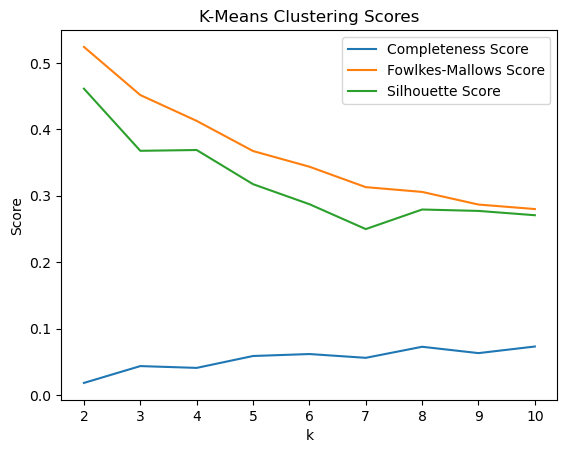

In [52]:
# Plot the scores
import matplotlib.pyplot as plt

plt.plot(completeness_scores.keys(), completeness_scores.values(), label='Completeness Score')
plt.plot(fowlkes_mallows_scores.keys(), fowlkes_mallows_scores.values(), label='Fowlkes-Mallows Score')
plt.plot(silhouette_scores.keys(), silhouette_scores.values(), label='Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('K-Means Clustering Scores')
plt.legend()
plt.show()